<a href="https://colab.research.google.com/github/wndnjs2037/2022_BigDataProgramming/blob/main/project/2016_2020_%EC%84%9C%EC%9A%B8%EC%8B%9C_%EC%8B%9C%EB%AF%BC_%ED%96%89%EB%B3%B5%EC%A7%80%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 서울 시민 행복지수 데이터를 기준으로 2016 ~ 2020 5년간의 종류별 행복지수 수치화
# 어느 구분이 가장 행복지수가 높고 낮은지 MAX 값과 MIN 값 확인
# 행복지수 구분 종류 - 자신의 건강상태 / 주위 친지, 친구와의 관계 / 가정생활 / 사회생활 4가지종류

In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid", palette="bright", font_scale=1.5)

plt.rc('font', family='NanumGothic')
plt.rcParams['figure.figsize'] = [8,5]

In [4]:
df = pd.read_csv("/content/drive/MyDrive/빅데이터프로그래밍/서울 시민 행복지수(구분별)_2016-2020.csv", encoding='cp949')
df.head(5)

,division,2016,2017,2018,2019,2020
0,가정생활,7.020,7.237,7.128,6.886,6.591
1,사회생활,6.895,7.068,6.900,6.749,6.362
2,자신의 건강상태,6.997,7.189,7.240,7.199,6.926
3,자신의 재정상태,6.127,6.243,6.171,6.192,5.874
4,"주위 친지, 친구와의 관계",6.933,7.166,7.211,6.867,6.573


In [5]:
df = df.set_index('division') 
df = df.transpose() 

df

division,가정생활,사회생활,자신의 건강상태,자신의 재정상태,"주위 친지, 친구와의 관계"
2016,7.020,6.895,6.997,6.127,6.933
2017,7.237,7.068,7.189,6.243,7.166
2018,7.128,6.900,7.240,6.171,7.211
2019,6.886,6.749,7.199,6.192,6.867
2020,6.591,6.362,6.926,5.874,6.573


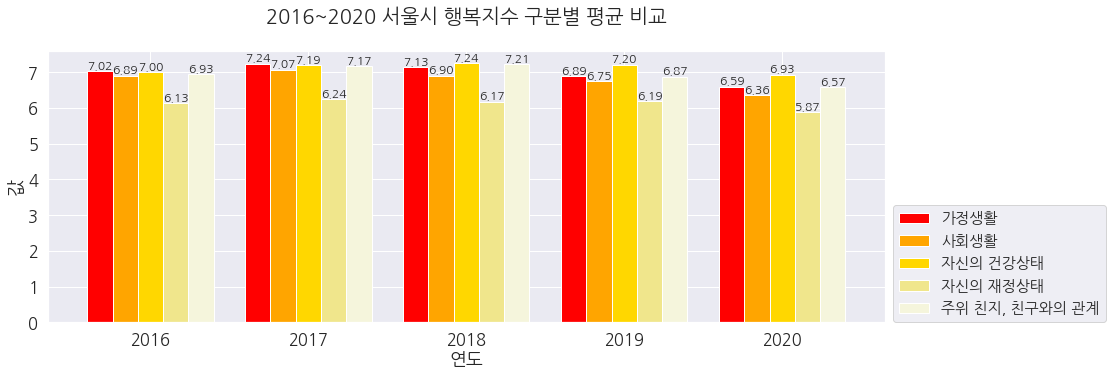

In [6]:
df = pd.read_csv("/content/drive/MyDrive/빅데이터프로그래밍/서울 시민 행복지수(구분별)_2016-2020.csv", encoding='cp949')

df = df.set_index('division') 
df = df.transpose() 

colors = ['red','orange','gold','khaki','beige'] #색상 지정
df = df.plot(kind='bar', figsize=(15,5), rot=0, color=colors, width=0.8)
plt.title("2016~2020 서울시 행복지수 구분별 평균 비교\n", fontsize=20)

for p in df.patches: #막대그래프 개수만큼 반복
    left, bottom, width, height = p.get_bbox().bounds
    df.annotate("%.2f" %(height), (left+width/2, height*1.01), ha='center', fontsize=12) #값 표시

plt.xlabel('연도')
plt.ylabel('값')
plt.legend(loc=(1.01,0), fontsize=15)

df

In [7]:
# 위의 데이터 시각화를 통해,
# 지난 5년간 평균적으로 행복지수가 가장 낮은 것은 자신의 재정상태이며, 행복지수가 가장 높은것은 자신의 건강상태이다.
# 이로 인해 서울 사람들은 건강상태에 대한 행복은 높지만, 재정과 관련된 행복은 다소 낮음을 알 수 있다.
